<a href="https://colab.research.google.com/github/abhay-2108/Instagram-Reach-Analysis/blob/main/Instagram_reach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('./instagram_reach.csv')

In [ ]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [ ]:
df.shape

(100, 8)

## Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [ ]:
df.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# create a copy of the dataframe
data = df.copy()

In [ ]:
data['Caption'].fillna('No Caption', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_34212\3095171053.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Caption'].fillna('No Caption', inplace=True)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            100 non-null    object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [ ]:
# Convert Time since posted into integer
data['hours'] = data['Time since posted'].str.split(' ').str[0].astype(int)

In [ ]:
data.drop('Time since posted',axis=1, inplace=True)

In [ ]:
data.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Likes,hours
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,139,11
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,23,2
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,25,2
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,49,3
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,30,3


In [ ]:
data.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Likes', 'hours'],
      dtype='object')

In [ ]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
data.columns

Index(['S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags', 'Likes',
       'hours'],
      dtype='object')

In [ ]:
data['Caption'][0]

'Who are #DataScientist and what do they do? >> @MikeQuindazzi >> #MachineLearning #AI #DataAnalytics #DataScienc #DataLake >> https://buff.ly/2kYmF0s'

In [ ]:
data['Hashtags'][0]

'#MachineLearning #AI #DataAnalytics #DataScienc #DataLake'

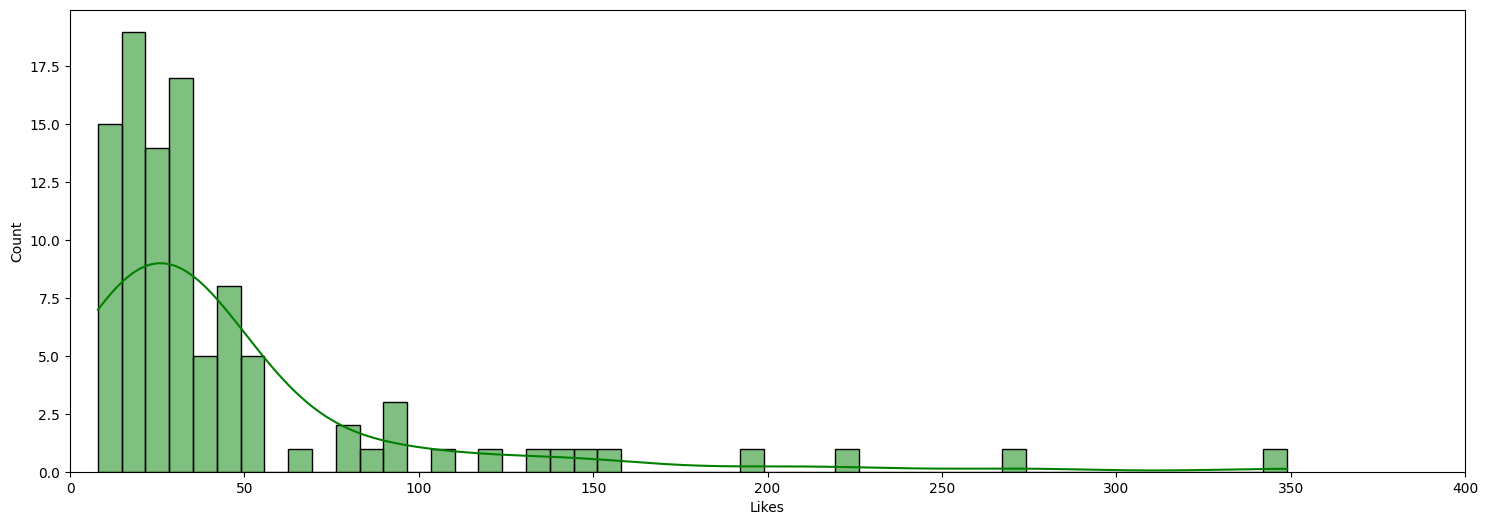

In [ ]:
plt.subplots(figsize=(18,6))
sns.histplot(data['Likes'], bins=50, kde=True, color = 'g')
plt.xlim(0,400)
plt.show()

###### Most of the user has 0-50 likes and very few has 200+ likes

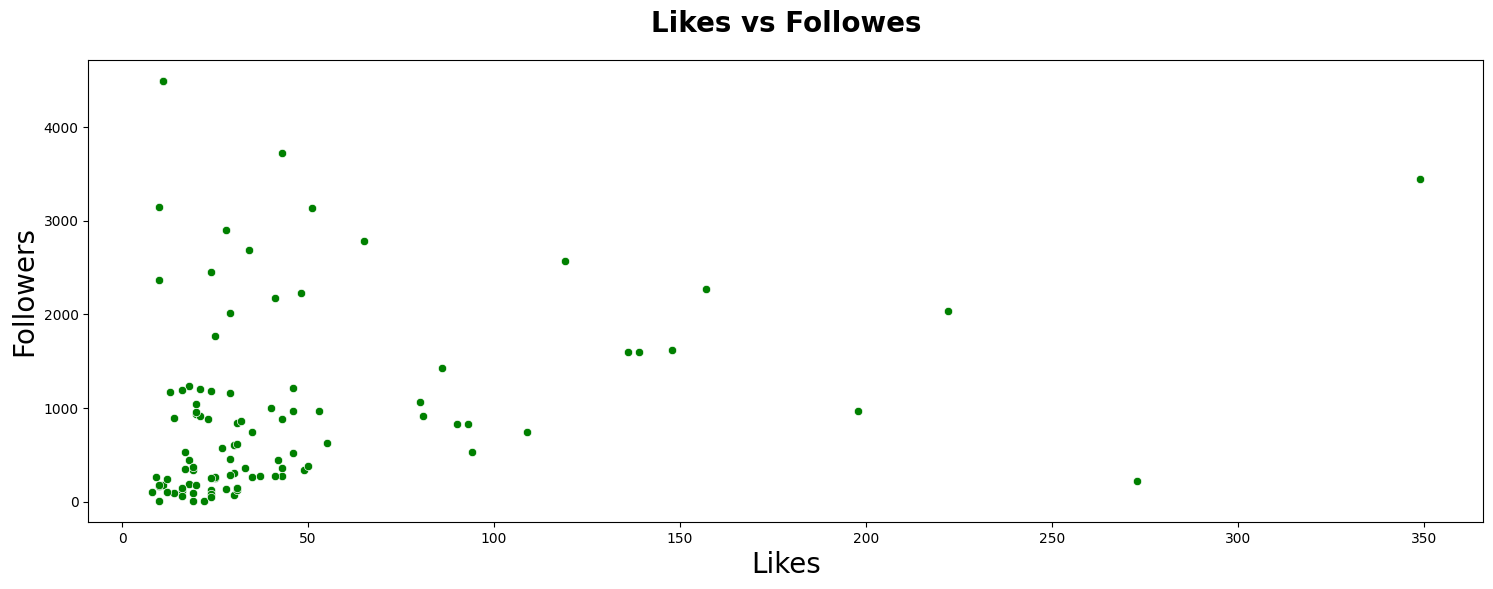

In [ ]:
plt.subplots(figsize=(18,6))
sns.scatterplot(x="Likes", y='Followers', data=data,color='g')
plt.title("Likes vs Followes", weight="bold",fontsize=20, pad=20)
plt.ylabel("Followers", fontsize=20)
plt.xlabel("Likes", fontsize=20)
plt.show()

###### User with less followers have less likes whereas users with more followers have more likes

In [ ]:
categorical_features = data.select_dtypes(include='object').columns
numerical_features = data.select_dtypes(exclude='object').columns

In [ ]:
print(categorical_features)
print(numerical_features)

Index(['USERNAME', 'Caption', 'Hashtags'], dtype='object')
Index(['S.No', 'Followers', 'Likes', 'hours'], dtype='object')


In [ ]:
numerical_features = numerical_features.drop('S.No')

In [ ]:
print(numerical_features)

Index(['Followers', 'Likes', 'hours'], dtype='object')


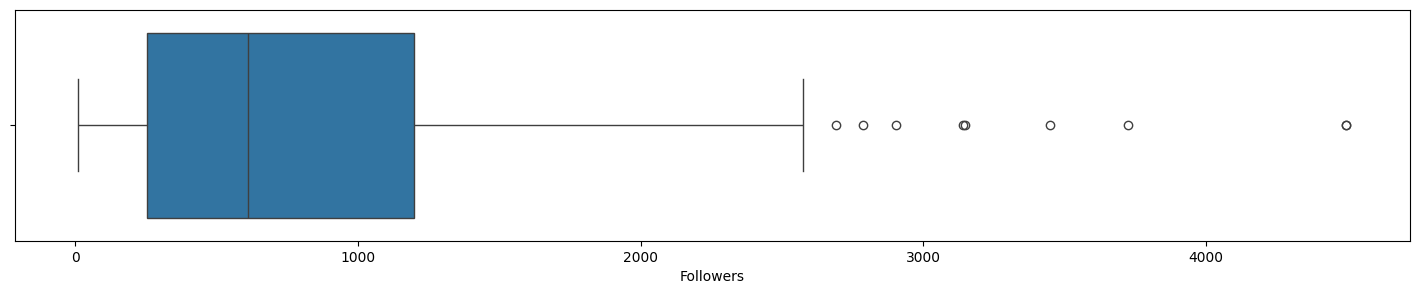

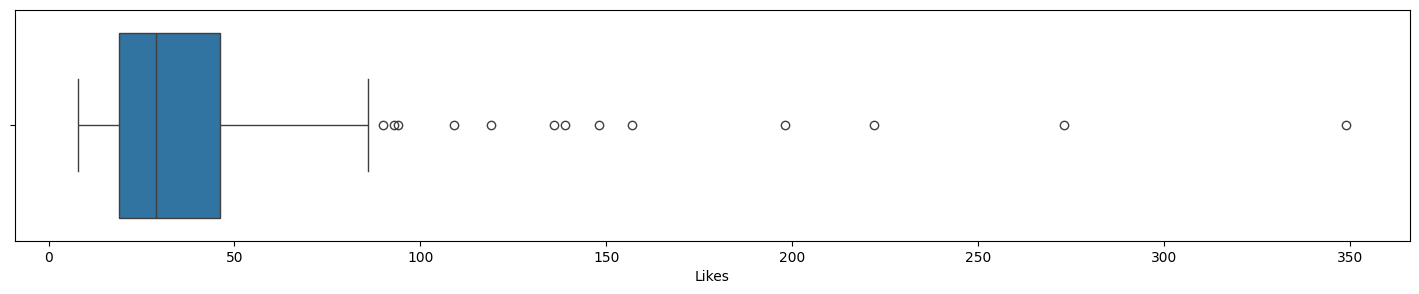

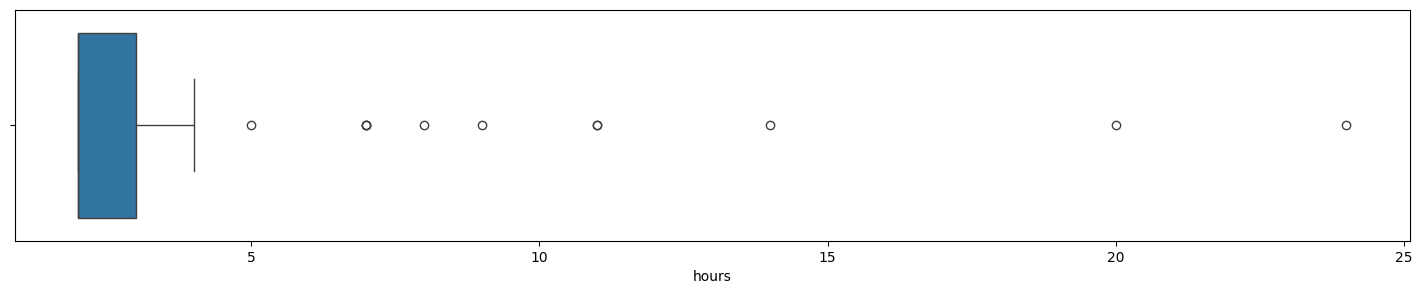

In [ ]:
# checking for outliers in the numerical columns
for i, col in enumerate(numerical_features):
    fig, ax = plt.subplots(figsize=(18, 3))  # Adjust the height for each subplot
    sns.boxplot(data=data, x=col, ax=ax)
    plt.show()

In [ ]:
# there are outliers, we use inter-quartile range to remove them

def whisker(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    return lower_whisker, upper_whisker

In [ ]:
for i in numerical_features:
    lw, uw = whisker(data[i])
    data[i] = np.where(data[i] < lw, lw, data[i])
    data[i] = np.where(data[i] > uw, uw, data[i])

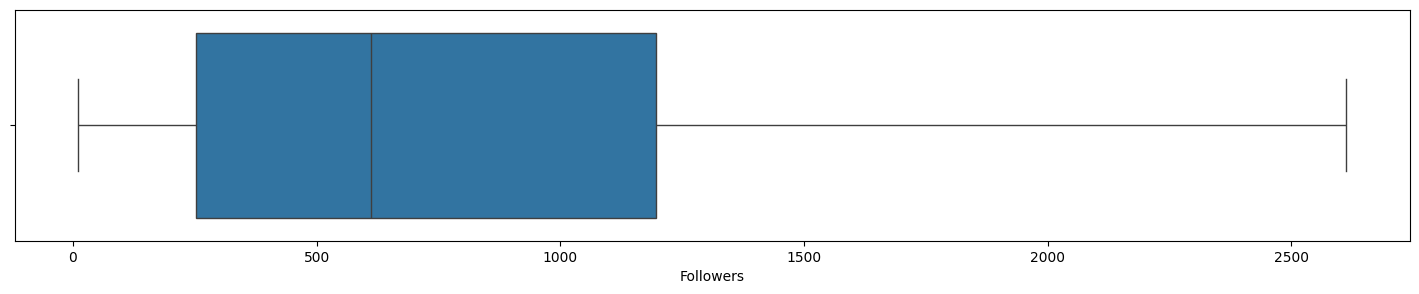

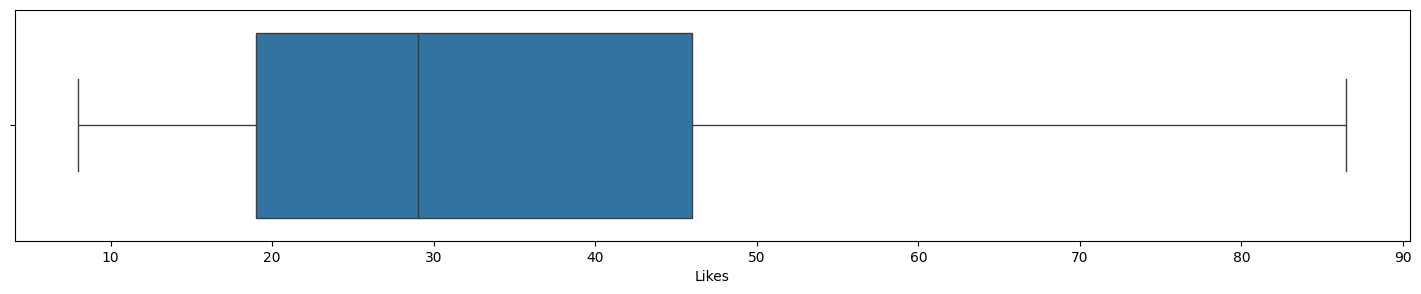

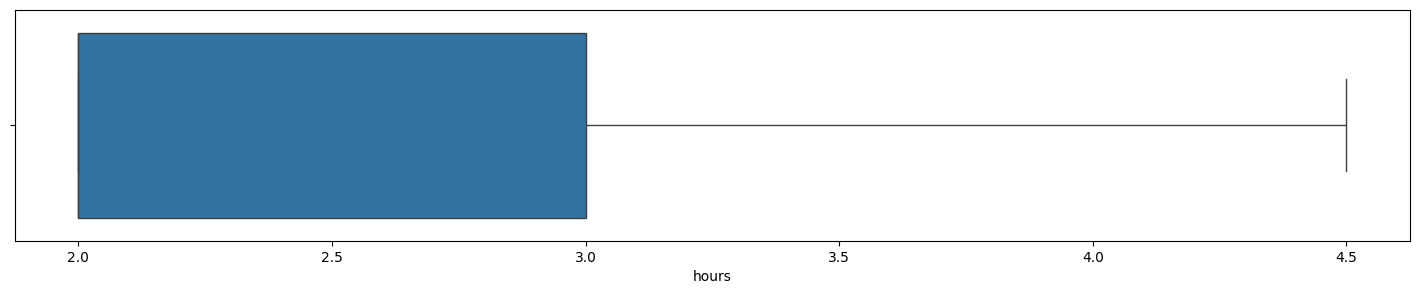

In [ ]:
for i, col in enumerate(numerical_features):
    fig, ax = plt.subplots(figsize=(18, 3))  # Adjust the height for each subplot
    sns.boxplot(data=data, x=col, ax=ax)
    plt.show()

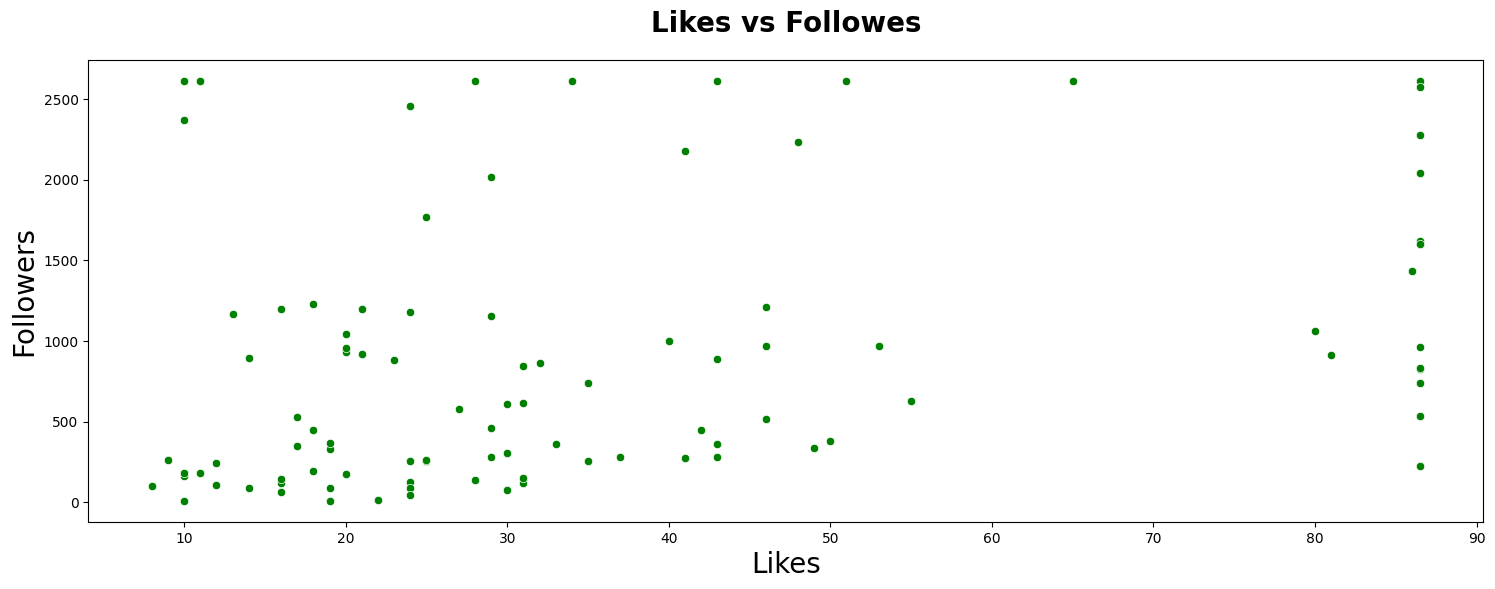

In [ ]:
plt.subplots(figsize=(18,6))
sns.scatterplot(x="Likes", y='Followers', data=data,color='g')
plt.title("Likes vs Followes", weight="bold",fontsize=20, pad=20)
plt.ylabel("Followers", fontsize=20)
plt.xlabel("Likes", fontsize=20)
plt.show()

In [ ]:
data.columns

Index(['S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags', 'Likes',
       'hours'],
      dtype='object')

In [ ]:
# converting categorical columns into numerical data
data['caption length'] = data['Caption'].apply(lambda x : len(str(x)))
data['hashtages length'] = data['Hashtags'].apply(lambda x : len(str(x).split()))

In [ ]:
data.head()

,S.No,USERNAME,Caption,Followers,Hashtags,Likes,hours,caption length,hashtages length
0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600.0,#MachineLearning #AI #DataAnalytics #DataScien...,86.5,4.5,149,5
1,2,drgorillapaints,We all know where it’s going. We just have to ...,880.0,#deck .#mac #macintosh#sayhello #apple #steve...,23.0,2.0,454,19
2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255.0,#whoiswho #aitrading #ai #aitradingteam#instat...,25.0,2.0,704,20
3,4,opensourcedworkplace,sfad,340.0,#iot #cre#workplace #CDO #bigdata #technology#...,49.0,3.0,4,20
4,5,crea.vision,Ever missed a call while your phone was chargi...,304.0,#instamachinelearning #instabigdata#instamarke...,30.0,3.0,322,18


In [ ]:
data.drop(['Caption','Hashtags','S.No'],axis=1,inplace=True)

In [ ]:
data.head()

,USERNAME,Followers,Likes,hours,caption length,hashtages length
0,mikequindazzi,1600.0,86.5,4.5,149,5
1,drgorillapaints,880.0,23.0,2.0,454,19
2,aitrading_official,255.0,25.0,2.0,704,20
3,opensourcedworkplace,340.0,49.0,3.0,4,20
4,crea.vision,304.0,30.0,3.0,322,18


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
data['USERNAME'] = le.fit_transform(data['USERNAME'])

In [ ]:
data.head()

,USERNAME,Followers,Likes,hours,caption length,hashtages length
0,64,1600.0,86.5,4.5,149,5
1,29,880.0,23.0,2.0,454,19
2,3,255.0,25.0,2.0,704,20
3,71,340.0,49.0,3.0,4,20
4,23,304.0,30.0,3.0,322,18


In [ ]:
data.corr()

,USERNAME,Followers,Likes,hours,caption length,hashtages length
USERNAME,1.000000,0.069132,0.062067,0.015133,-0.225388,-0.078367
Followers,0.069132,1.000000,0.308633,0.184224,-0.065011,-0.031918
Likes,0.062067,0.308633,1.000000,0.417261,-0.133486,-0.012174
hours,0.015133,0.184224,0.417261,1.000000,-0.044611,-0.031855
caption length,-0.225388,-0.065011,-0.133486,-0.044611,1.000000,0.083426
hashtages length,-0.078367,-0.031918,-0.012174,-0.031855,0.083426,1.000000


<Axes: >

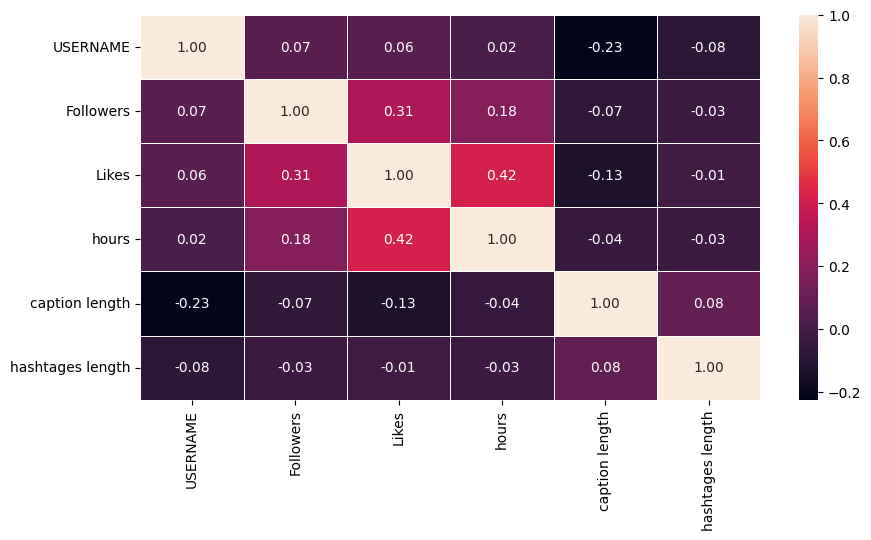

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(), annot=True, fmt='.2f', linewidths=0.5)

### Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error,mean_absolute_error


In [ ]:
X = data[['Followers','caption length','hashtages length']]
y = data[['Likes','hours']]
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
#Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
!pip install xgboost
from xgboost import XGBRegressor

In [ ]:
lr = LinearRegression()
knr = KNeighborsRegressor()
dtr = DecisionTreeRegressor(max_depth=5)
rfr = RandomForestRegressor(n_estimators=50, random_state=2)
br = BaggingRegressor(n_estimators=50, random_state=2)
etr = ExtraTreesRegressor(n_estimators=50, random_state=2)
xgb = XGBRegressor(n_estimators=50, random_state=2)

In [ ]:
regressor = {
    'LR' : lr,
    'KN' : knr,
    'DT': dtr,
    'RF': rfr,
    'BgR': br,
    'ETR': etr,
    'xgb':xgb
}

In [ ]:
def train_regressor(reg, X_train, X_test, y_train, y_test):
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    root_mean = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    absolute = mean_absolute_error(y_pred,y_test)
    return root_mean, r2,absolute

In [ ]:
train_regressor(xgb,X_train, X_test, y_train, y_test)

(10.402316093444824, 0.12203934788703918, 6.9954657554626465)

In [ ]:
root_mean_error = []
r2_error_score = []
mean_absolute = []
for name, reg in regressor.items():
    current_root, current_r2, current_absolute = train_regressor(reg, X_train, X_test, y_train, y_test)
    print(f'{name} root mean error is {current_root}')
    print(f'{name} r2 score is {current_r2}')
    print(f'{name} mean absolute error is {current_absolute}')
    root_mean_error.append(current_root)
    r2_error_score.append(current_r2)
    mean_absolute.append(current_absolute)

LR root mean error is 12.155968065201922
LR r2 score is 0.08502865481319188
LR mean absolute error is 9.231543505090874
KN root mean error is 12.923477304273474
KN r2 score is 0.07198030871112787
KN mean absolute error is 10.073999999999998
DT root mean error is 10.451890687796281
DT r2 score is 0.05834873569067223
DT mean absolute error is 6.661764705882353
RF root mean error is 10.64516025781502
RF r2 score is 0.11249095779629581
RF mean absolute error is 7.792999999999999
BgR root mean error is 10.814607461747265
BgR r2 score is 0.09760133675331628
BgR mean absolute error is 7.883399999999999
ETR root mean error is 10.551329151158223
ETR r2 score is 0.11137153274476191
ETR mean absolute error is 8.1794
xgb root mean error is 10.402316093444824
xgb r2 score is 0.12203934788703918
xgb mean absolute error is 6.9954657554626465


In [ ]:
performance_df = pd.DataFrame({'Algorithm' : regressor.keys(),'Root Mean Error' : root_mean_error, 'R2 Score': r2_error_score, 'Mean Absolute Error' : mean_absolute}).sort_values('Root Mean Error',ascending=False)

In [ ]:
performance_df

,Algorithm,Root Mean Error,R2 Score,Mean Absolute Error
1,KN,12.923477,0.071980,10.074000
0,LR,12.155968,0.085029,9.231544
4,BgR,10.814607,0.097601,7.883400
3,RF,10.645160,0.112491,7.793000
5,ETR,10.551329,0.111372,8.179400
2,DT,10.451891,0.058349,6.661765
6,xgb,10.402316,0.122039,6.995466


XGBoost (xgb) is the best algorithm among the ones listed.

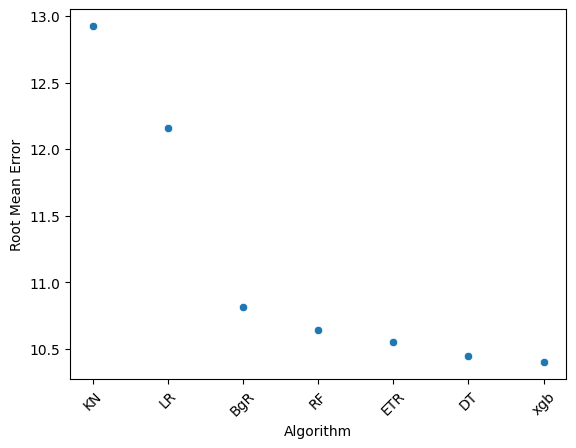

In [ ]:
sns.scatterplot(x='Algorithm', y='Root Mean Error', data=performance_df)
plt.xticks(rotation=45)
plt.show()

###### Decision Tree has minimum error among all Algorithms

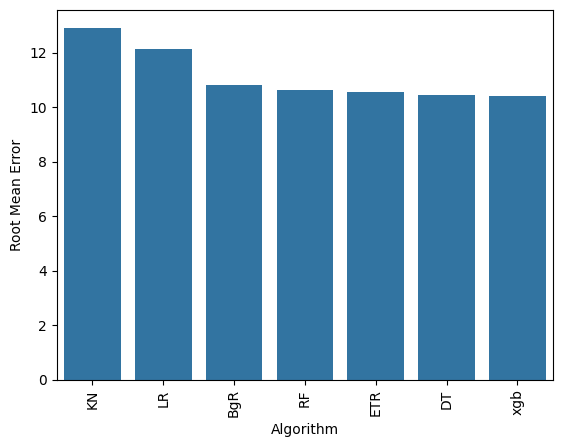

In [ ]:
sns.barplot(x='Algorithm', y='Root Mean Error', data=performance_df)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
import pickle

# Identify the best model based on the lowest Root Mean Error
best_model_name = performance_df.loc[performance_df['Root Mean Error'].idxmin(), 'Algorithm']
best_model = regressor[best_model_name]
print(best_model)

with open('instagram.pkl', 'wb') as file:
    pickle.dump(best_model, file)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=50,
             n_jobs=None, num_parallel_tree=None, ...)
